# Pipeline to obtain Analyses on DMN dynamics in TVB-AdEx

In [74]:
%%capture --no-display
!pip install --upgrade tvb-library
!pip install --upgrade tvb-data

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tvb_model_reference.src.nuu_tools_simulation_human as tools

from tvb_model_reference.simulation_file.parameter.parameter_M_Berlin import Parameter
from tvb_model_reference.view.plot_human import multiview_one, prepare_surface_regions_human
from analyses import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import itertools

parameters = Parameter()

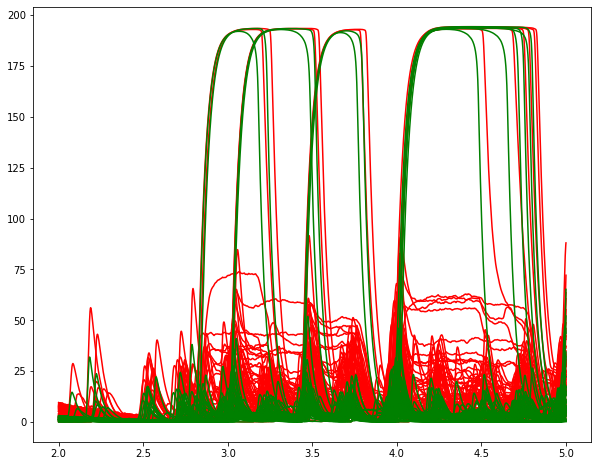

In [76]:
# Select a folder_root

folder_root = '/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_jusuf/' # Hard disk in ubuntu
# Define the parameters that we will use
cut_transient = 2000.0
run_sim = 5000.0

S = 0.5
b_e = 120.0
E_L_e = -60.0
E_L_i = -80.0
T = 40.0

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

label_sim = '_a_' + str(S) + '_b_' + str(b_e) + '_ELI_' + str(E_L_i) + \
            '_ELE_' + str(E_L_e) + '_T_' + str(T) + '/'

file_name = folder_root + label_sim

# Draw plots of the firing rates
result = tools.get_result(file_name,cut_transient,run_sim)
time_s = result[0][0]*1e-3 #from ms to sec
FR_exc = result[0][1][:,0,:]*1e3 # from KHz to Hz; Excitatory firing rate
FR_inh = result[0][1][:,1,:]*1e3 # from KHz to Hz; Inhibitory firing rate
time_s = np.array(time_s, dtype=float)
del result

ax.plot(time_s, FR_inh, label=r'$v_i$', c='r')
ax.plot(time_s, FR_exc, label=r'$v_e$', c='g')

plt.show()

# Select a label for the simulation being analyzed where the resulting figures will be saved

In [77]:
sim_name = label_sim[:-1]

folder_figs = './figures/' + sim_name + '/'

try:
    os.listdir(folder_figs)
except:
    os.mkdir(folder_figs)

In [45]:
# Prepare the elements that we will need to find the interesting nodes
cortex, conn, hem_left, hem_right = prepare_surface_regions_human(parameters, 
                                                                  conn_filename='Connectivity.zip',
                                                                  zip_filename='Surface_Cortex.zip',
                                                                  region_map_filename='RegionMapping.txt')
the_data = np.zeros((cortex.region_mapping_data.array_data.shape[0],))

# DMN nodes that we will use for the analyses

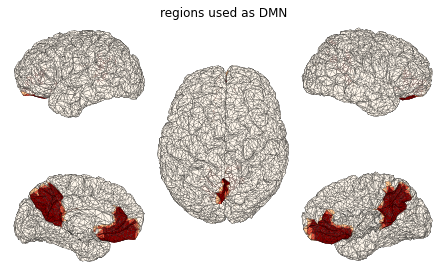

In [66]:
DMN_regions = [28, 29, 52, 53,  # mPFC
          50, 51, 20, 21]   # precuneus and posterior cingulate (seems large)

title = 'regions used as DMN'  # We are clearly missing the angular gyri
multiview_one(cortex, hem_left, hem_right, 
              DMN_regions, the_data, plt.figure(), suptitle='', 
              title=title, figsize=(8, 8), shaded=False)
fig.savefig(folder_figs + sim_name + 'DMN_regions.png')

# Obtaining the pearson correlation coefficient between nodes taking into account the DMN

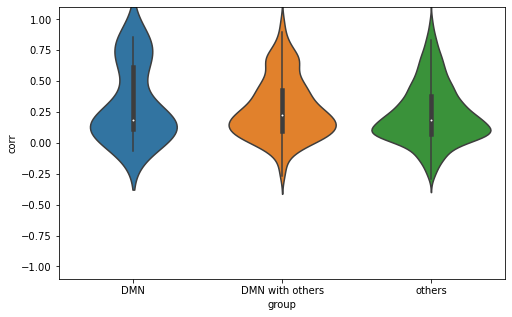

In [61]:
fig, ax = plot_corr_dmn(corr_dmn(FR_exc), type_plot='violin', jitter=False)
fig.savefig(folder_figs + sim_name + 'corr_DMN_others.png')
plt.show()

# Obtaining the FR histogram for nodes in and out the DMN

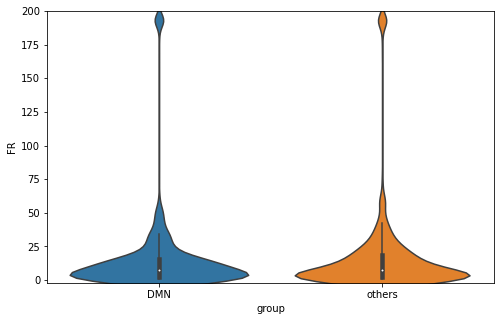

In [62]:
hist_DMN, hist_others, bins_edges = hist_FR_dmn(FR_inh)
# bw can be adjusted to smooth the problems edges of the histogram.
fig, ax = plot_violin_hist_FR(hist_DMN, hist_others, bins_edges, jitter=False, bw_violin=0.15)
fig.savefig(folder_figs + sim_name + 'histFR_DMN_others.png')

# Plot the mean FR in time for each region

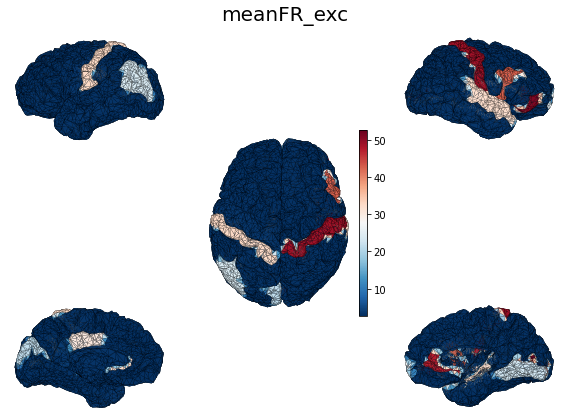

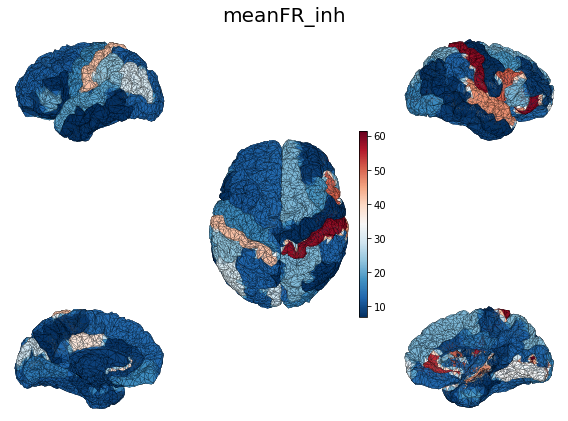

In [63]:
mean_t_FR_exc = np.mean(FR_exc, axis=0)
mean_t_FR_inh = np.mean(FR_inh, axis=0)
idx_regions = np.arange(68)
means = [mean_t_FR_exc, mean_t_FR_inh]
labels = ['meanFR_exc', 'meanFR_inh']

for ii, mean_array in enumerate(means):
    zlim = (np.amin(mean_array), np.amax(mean_array))
    fig = multiview_z_score(cortex, hem_left, hem_right, idx_regions, mean_array, 
                            zlim=zlim, title=labels[ii], figsize=(8, 8))
    fig.savefig(folder_figs + sim_name + labels[ii] + '_brainmap.png')
    plt.show()

# Correlations with a seed region that belongs to the DMN

/tmp/ipykernel_18324/3770542858.py:5: RuntimeWarning: divide by zero encountered in arctanh
  z_value_wrt_seed = np.arctanh(corrs_wrt_seed)


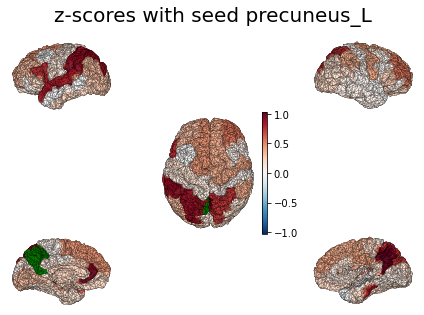

In [65]:
parameters = Parameter()
possible_seed = 50 #[50, 51, 20, 21]  # precuneus and posterior cingulate (seems large)
FC = np.corrcoef(FR_exc.T)
corrs_wrt_seed = FC[:, possible_seed]
z_value_wrt_seed = np.arctanh(corrs_wrt_seed)

# We want to ignore the values of the seed region
idx_regions_without_seed = np.concatenate((np.arange(0, possible_seed), np.arange(possible_seed+1, 68)))
zlim = np.amax(np.abs(z_value_wrt_seed[idx_regions_without_seed]))

fig = multiview_z_score(cortex, hem_left, hem_right, idx_regions_without_seed, 
                        z_value_wrt_seed, zlim=zlim, seed_region=possible_seed,
                        title=f'z-scores with seed {conn.region_labels[possible_seed]}',
                        figsize=(6, 6))
fig.savefig(folder_figs + sim_name + labels[ii] + 'zscores.png')
plt.tight_layout()
plt.show()

# Visualize stimulus dynamics

simulation time :1000.0
simulation time :2000.0
simulation time :3000.0
simulation time :4000.0
simulation time :5000.0


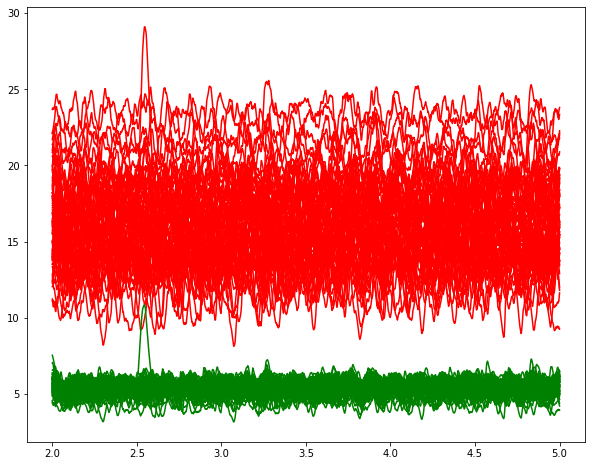

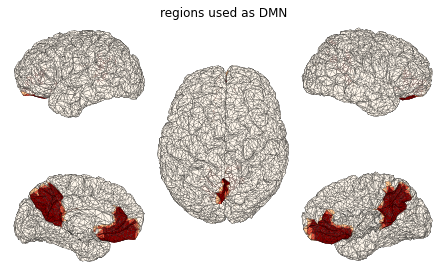

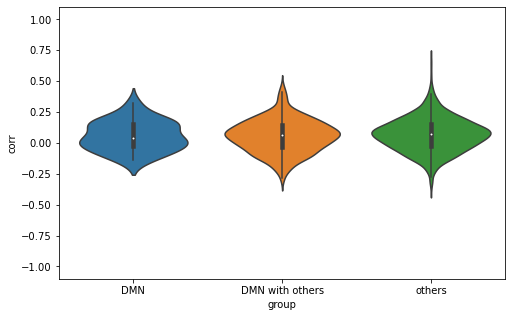

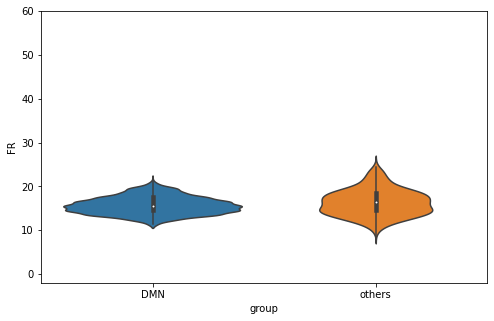

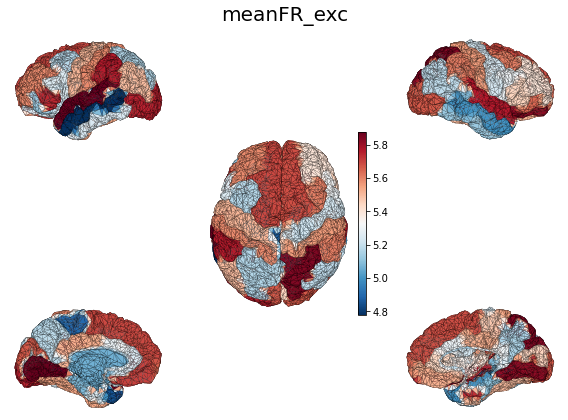

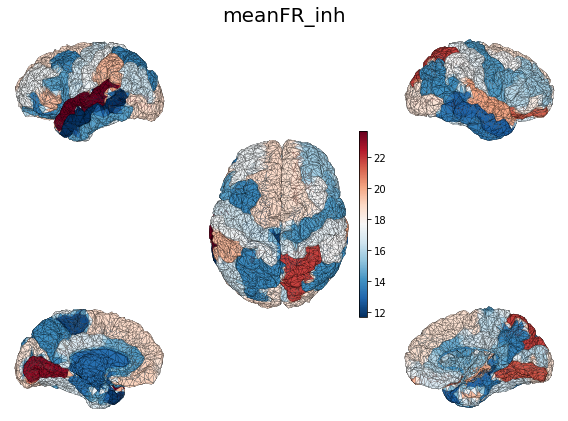

/tmp/ipykernel_18324/1547852827.py:110: RuntimeWarning: divide by zero encountered in arctanh
  z_value_wrt_seed = np.arctanh(corrs_wrt_seed)


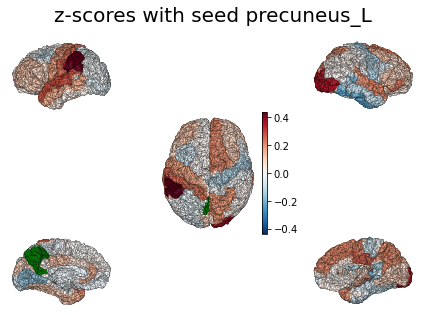

simulation time :1000.0


/home/master/anaconda3/envs/tvbadexgraph/lib/python3.10/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


simulation time :2000.0
simulation time :3000.0
simulation time :4000.0
simulation time :5000.0


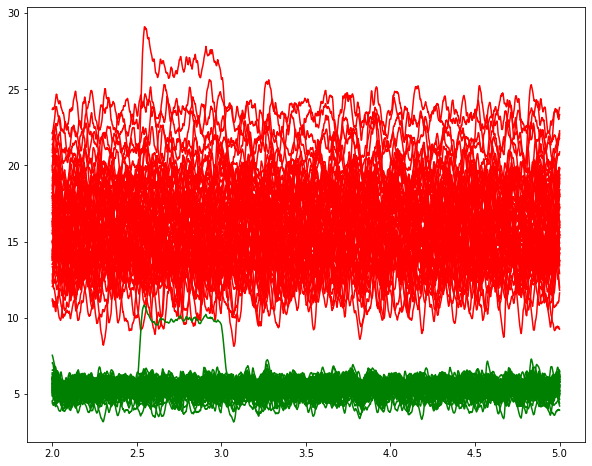

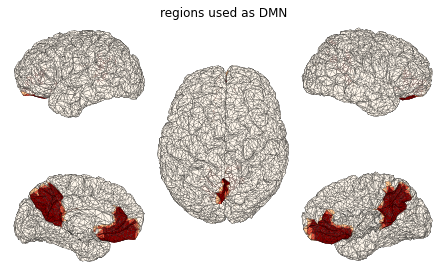

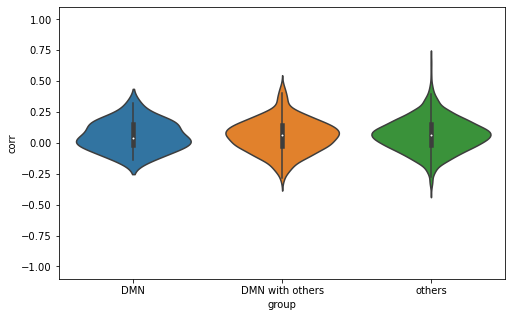

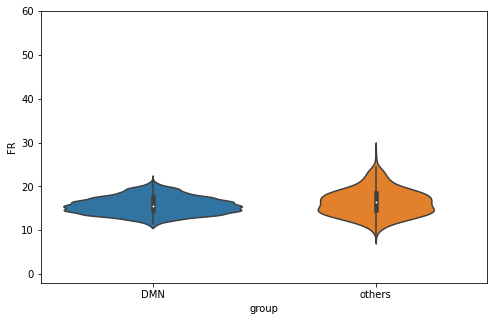

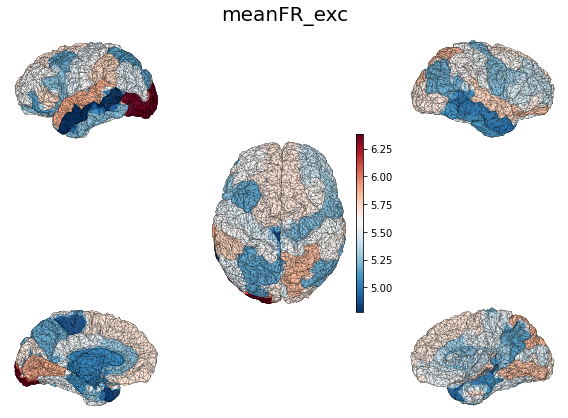

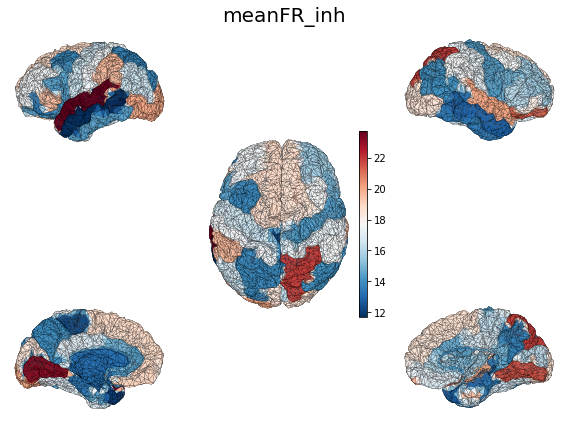

/tmp/ipykernel_18324/1547852827.py:110: RuntimeWarning: divide by zero encountered in arctanh
  z_value_wrt_seed = np.arctanh(corrs_wrt_seed)


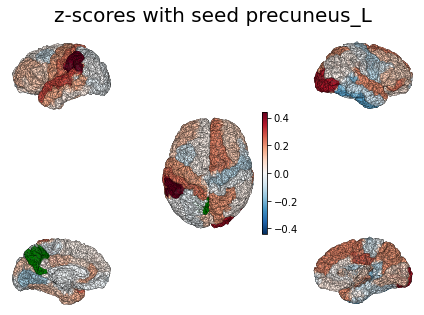

simulation time :1000.0


/home/master/anaconda3/envs/tvbadexgraph/lib/python3.10/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


simulation time :2000.0
simulation time :3000.0
simulation time :4000.0
simulation time :5000.0


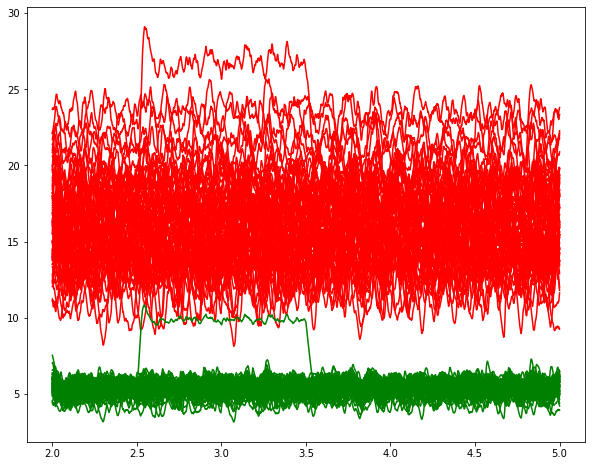

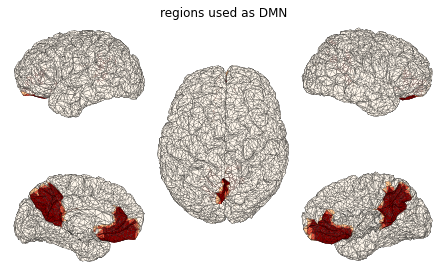

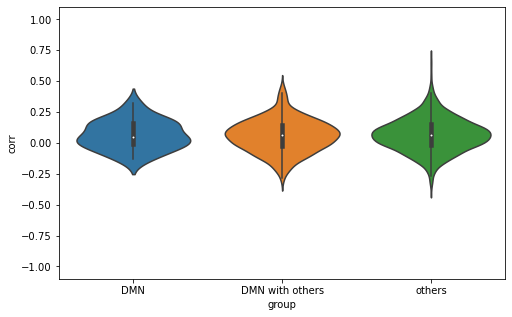

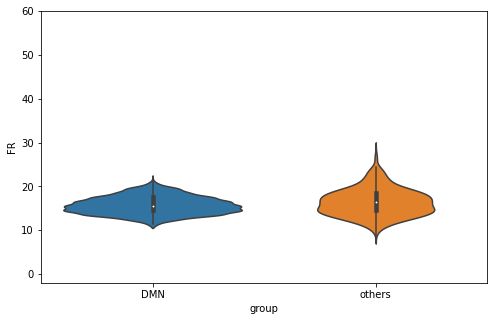

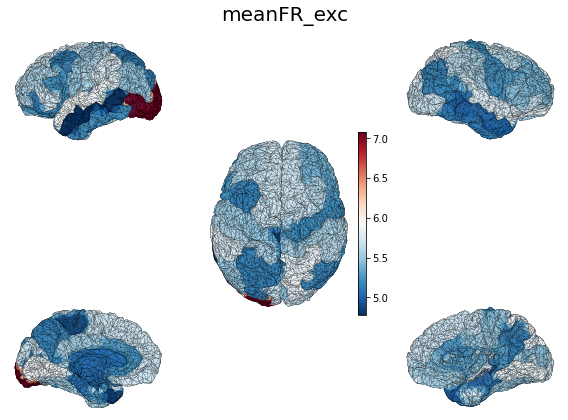

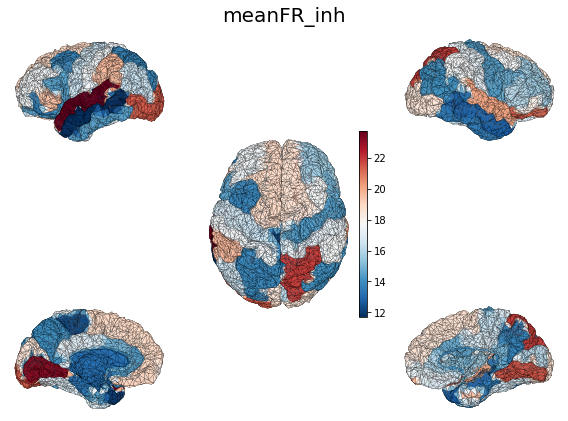

/tmp/ipykernel_18324/1547852827.py:110: RuntimeWarning: divide by zero encountered in arctanh
  z_value_wrt_seed = np.arctanh(corrs_wrt_seed)


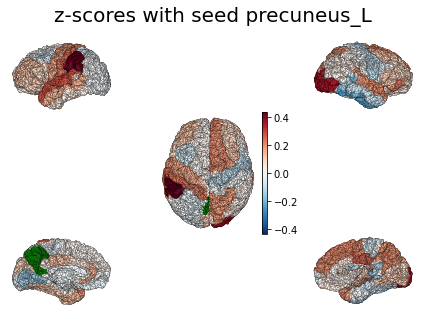

simulation time :1000.0


/home/master/anaconda3/envs/tvbadexgraph/lib/python3.10/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


simulation time :2000.0
simulation time :3000.0
simulation time :4000.0
simulation time :5000.0


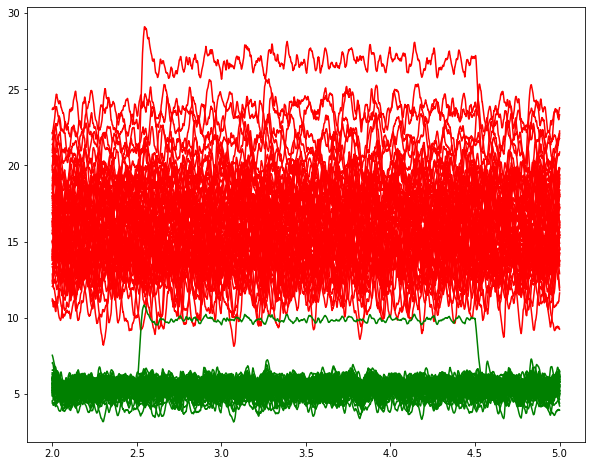

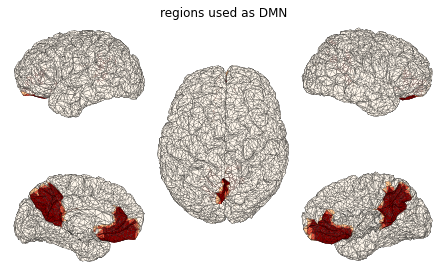

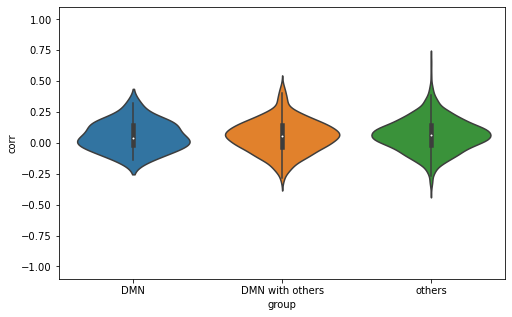

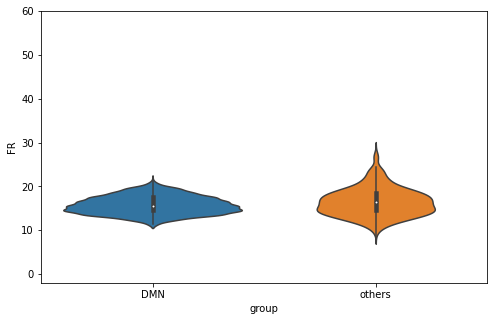

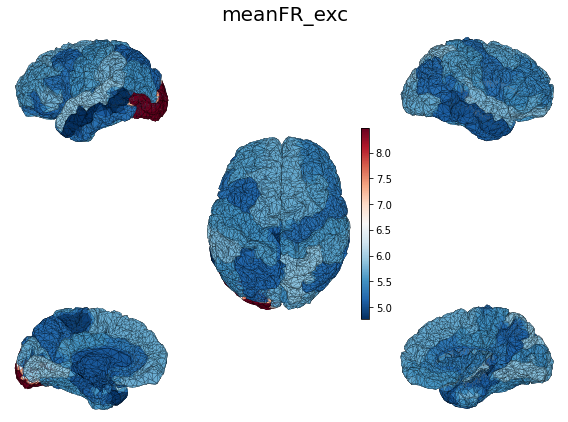

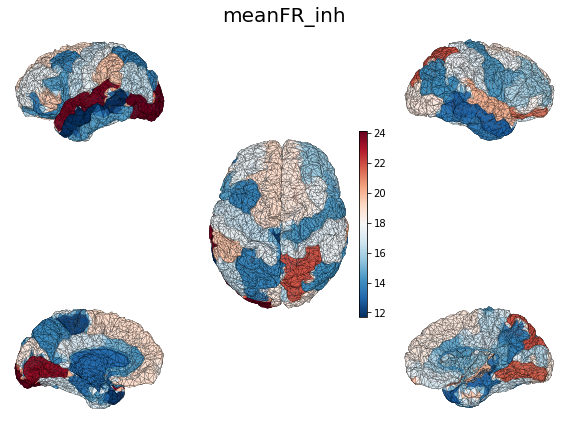

/tmp/ipykernel_18324/1547852827.py:110: RuntimeWarning: divide by zero encountered in arctanh
  z_value_wrt_seed = np.arctanh(corrs_wrt_seed)


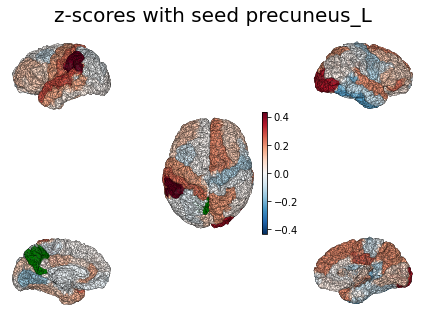

In [92]:
folder_root = '/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_test_DMN/'
# Define the parameters that we will use
cut_transient = 2000.0
run_sim = 5000.0

stimval_max = 0.1
stimvals = [stimval_max]  # stimval_max/3, stimval_max/2 , stimval_max]
stim_lens = [50, 500, 1000, 2000]  # in ms
stim_region = 22

lst = [stimvals, stim_lens]

combinaison = list(itertools.product(*lst))

for simnum in range(len(combinaison)):
    
    parameters.parameter_model['b_e'] = 0.0
    stimval = combinaison[simnum][0]
    stimlen = combinaison[simnum][1]

    weights = list(np.zeros(68))
    weights[stim_region] = stimval  / 1000  # 0.1 Hz if the model runs with kHz.

    parameters.parameter_stimulus['tau'] = stimlen  # Stimulus duration
    parameters.parameter_stimulus['T'] = 1e9  # Interstimulus interval
    parameters.parameter_stimulus['weights'] = weights
    parameters.parameter_stimulus['variables'] = [0]  # kick FR_exc
    parameters.parameter_stimulus['onset'] = 2500.0  # All stimuli start at 2.5s
    
    label_sim = '_stimval_' + str(stimval) + '_stimlen_' + str(stimlen) + 'stimregion22/'

    file_name = folder_root + label_sim
    parameters.parameter_simulation['path_result'] = file_name

    # Set up simulator with new parameters
    simulator = tools.init(parameters.parameter_simulation, parameters.parameter_model,
                           parameters.parameter_connection_between_region,
                           parameters.parameter_coupling,
                           parameters.parameter_integrator,
                           parameters.parameter_monitor,
                           parameter_stimulation=parameters.parameter_stimulus)

    # Run simulations
    tools.run_simulation(simulator, run_sim, parameters.parameter_simulation, parameters.parameter_monitor)

    label_sim = '_stimval_' + str(stimval) + '_stimlen_' + str(stimlen) + 'stimregion22/'
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))


    file_name = folder_root + label_sim
    
    # Draw plots of the firing rates
    result = tools.get_result(file_name,cut_transient,run_sim)
    time_s = result[0][0]*1e-3 #from ms to sec
    FR_exc = result[0][1][:,0,:]*1e3 # from KHz to Hz; Excitatory firing rate
    FR_inh = result[0][1][:,1,:]*1e3 # from KHz to Hz; Inhibitory firing rate
    time_s = np.array(time_s, dtype=float)
    del result

    ax.plot(time_s, FR_inh, label=r'$v_i$', c='r')
    ax.plot(time_s, FR_exc, label=r'$v_e$', c='g')
    plt.show()
    sim_name = label_sim[:-1]

    folder_figs = './figures/' + sim_name + '/'

    try:
        os.listdir(folder_figs)
    except:
        os.mkdir(folder_figs)
        
    # Prepare the elements that we will need to find the interesting nodes
    cortex, conn, hem_left, hem_right = prepare_surface_regions_human(parameters, 
                                                                      conn_filename='Connectivity.zip',
                                                                      zip_filename='Surface_Cortex.zip',
                                                                      region_map_filename='RegionMapping.txt')
    the_data = np.zeros((cortex.region_mapping_data.array_data.shape[0],))

    DMN_regions = [28, 29, 52, 53,  # mPFC
              50, 51, 20, 21]   # precuneus and posterior cingulate (seems large)

    title = 'regions used as DMN'  # We are clearly missing the angular gyri
    multiview_one(cortex, hem_left, hem_right, 
                  DMN_regions, the_data, plt.figure(), suptitle='', 
                  title=title, figsize=(8, 8), shaded=False)
    fig.savefig(folder_figs + sim_name + 'DMN_regions.png')
    fig, ax = plot_corr_dmn(corr_dmn(FR_exc), type_plot='violin', jitter=False)
    fig.savefig(folder_figs + sim_name + 'corr_DMN_others.png')
    plt.show()
    hist_DMN, hist_others, bins_edges = hist_FR_dmn(FR_inh)
    # bw can be adjusted to smooth the problems edges of the histogram.
    fig, ax = plot_violin_hist_FR(hist_DMN, hist_others, bins_edges, jitter=False, bw_violin=0.25)
    fig.savefig(folder_figs + sim_name + 'histFR_DMN_others.png')
    mean_t_FR_exc = np.mean(FR_exc, axis=0)
    mean_t_FR_inh = np.mean(FR_inh, axis=0)
    idx_regions = np.arange(68)
    means = [mean_t_FR_exc, mean_t_FR_inh]
    labels = ['meanFR_exc', 'meanFR_inh']

    for ii, mean_array in enumerate(means):
        zlim = (np.amin(mean_array), np.amax(mean_array))
        fig = multiview_z_score(cortex, hem_left, hem_right, idx_regions, mean_array, 
                                zlim=zlim, title=labels[ii], figsize=(8, 8))
        fig.savefig(folder_figs + sim_name + labels[ii] + '_brainmap.png')
        plt.show()
    parameters = Parameter()
    possible_seed = 50 #[50, 51, 20, 21]  # precuneus and posterior cingulate (seems large)
    FC = np.corrcoef(FR_exc.T)
    corrs_wrt_seed = FC[:, possible_seed]
    z_value_wrt_seed = np.arctanh(corrs_wrt_seed)

    # We want to ignore the values of the seed region
    idx_regions_without_seed = np.concatenate((np.arange(0, possible_seed), np.arange(possible_seed+1, 68)))
    zlim = np.amax(np.abs(z_value_wrt_seed[idx_regions_without_seed]))

    fig = multiview_z_score(cortex, hem_left, hem_right, idx_regions_without_seed, 
                            z_value_wrt_seed, zlim=zlim, seed_region=possible_seed,
                            title=f'z-scores with seed {conn.region_labels[possible_seed]}',
                            figsize=(6, 6))
    fig.savefig(folder_figs + sim_name + labels[ii] + 'zscores.png')
    plt.tight_layout()
    plt.show()

In [84]:
print(parameters.parameter_model)

{'matteo': False, 'order': 2, 'g_L': 10.0, 'E_L_e': -63.0, 'E_L_i': -65.0, 'C_m': 200.0, 'b_e': 0.0, 'a_e': 0.0, 'b_i': 0.0, 'a_i': 0.0, 'tau_w_e': 500.0, 'tau_w_i': 1.0, 'E_e': 0.0, 'E_i': -80.0, 'Q_e': 1.5, 'Q_i': 5.0, 'tau_e': 5.0, 'tau_i': 5.0, 'N_tot': 10000, 'p_connect_e': 0.05, 'p_connect_i': 0.05, 'g': 0.2, 'T': 40.0, 'P_e': [-0.0498, 0.00506, -0.025, 0.0014, -0.00041, 0.0105, -0.036, 0.0074, 0.0012, -0.0407], 'P_i': [-0.0514, 0.004, -0.0083, 0.0002, -0.0005, 0.0014, -0.0146, 0.0045, 0.0028, -0.0153], 'external_input_ex_ex': 0.000315, 'external_input_ex_in': 0.0, 'external_input_in_ex': 0.000315, 'external_input_in_in': 0.0, 'tau_OU': 5.0, 'weight_noise': 0.0001, 'K_ext_e': 400, 'K_ext_i': 0, 'initial_condition': {'E': [0.0, 0.0], 'I': [0.0, 0.0], 'C_ee': [0.0, 0.0], 'C_ei': [0.0, 0.0], 'C_ii': [0.0, 0.0], 'W_e': [100.0, 100.0], 'W_i': [0.0, 0.0], 'noise': [0.0, 0.0]}}


In [94]:
parameters.parameter_integrator

{'type': 'Heun',
 'stochastic': True,
 'noise_type': 'Additive',
 'noise_parameter': {'nsig': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  'ntau': 0.0,
  'dt': 0.1},
 'dt': 0.1}

# Seeing how the FC changes from before to after stimuli

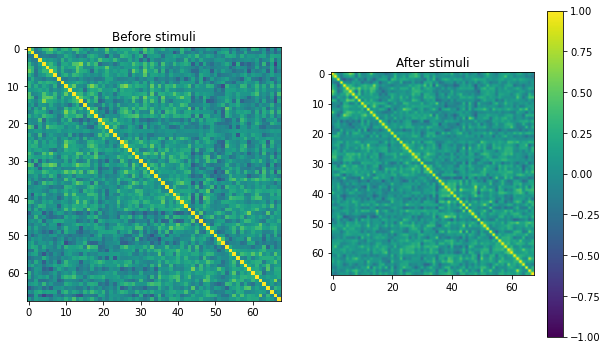

833.1462901797522
777.0869869619289
712.357548439526


In [98]:
time_stimuli = 2500.0
idx_in_stim = int(time_stimuli - cut_transient/parameters.parameter_integrator['dt'])
FR = FR_exc
FC_before = np.corrcoef(FR[:idx_in_stim, :].T)
FC_after = np.corrcoef(FR[idx_in_stim:, :].T)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].imshow(FC_before, vmin=-1, vmax=1)
axes[0].set(title='Before stimuli')

im = axes[1].imshow(FC_after, vmin=-1, vmax=1)
axes[1].set(title='After stimuli')
plt.colorbar(im)

plt.show()

print(np.sum(np.abs(FC_before - FC_after)))
print(np.sum(np.abs(FC_before)))
print(np.sum(np.abs(FC_after)))